<a href="https://colab.research.google.com/github/nadiataoufik/Customer-churn/blob/master/ANN_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
# import relevant libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [66]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
# load data 
data=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [68]:
# import libraries 
#load the data 
#data preprocessing 
#buiding the ANN 
# training the ANN
#making the predictiob abd make evaluation

In [100]:
# dara preprocessing 
X=data.iloc[:,3:-1].values
y=data.iloc[:,-1].values

In [102]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [71]:
X.shape
X[:,1]

array(['France', 'Spain', 'France', ..., 'France', 'Germany', 'France'],
      dtype=object)

In [72]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [103]:
#convert the gender into number 
le=LabelEncoder()
X[:,2]=le.fit_transform(X[:,2])

In [104]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [105]:
#convert countries into numbers 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [106]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')

In [107]:
X=np.array(ct.fit_transform(X))

In [108]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [79]:
#split the data into training and testing set 
from sklearn.model_selection import train_test_split

In [109]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [81]:
X_train.shape

(7500, 12)

In [82]:
X_test.shape

(2500, 12)

In [83]:
y_train.shape

(7500,)

In [110]:
# feature sclassing 
from sklearn.preprocessing import  StandardScaler

In [111]:
st=StandardScaler()

In [112]:
X_train=st.fit_transform(X_train)

In [113]:
X_test=st.transform(X_test)

In [114]:
type(X_train)

numpy.ndarray

In [89]:
X_train_scaled

array([[ 1.00615226, -0.58658846, -0.57283404, ...,  0.6509149 ,
        -1.0248418 ,  0.66570921],
       [-0.99388536,  1.70477271, -0.57283404, ..., -1.53629914,
         0.97576036, -0.04810412],
       [ 1.00615226, -0.58658846, -0.57283404, ..., -1.53629914,
         0.97576036,  1.336802  ],
       ...,
       [ 1.00615226, -0.58658846, -0.57283404, ...,  0.6509149 ,
        -1.0248418 , -1.51374702],
       [ 1.00615226, -0.58658846, -0.57283404, ..., -1.53629914,
         0.97576036,  1.26253618],
       [-0.99388536,  1.70477271, -0.57283404, ...,  0.6509149 ,
        -1.0248418 , -1.08503707]])

In [90]:
# part 2: BUILDING the ANN 
# INITIALizING the ANN 
# ADDING INPUT LAYER AND THE FIRST HIDDEN LAYER
#ADDING THE SECOND HIDDEN LAYER 
# ADDING THE OUTPUT LAYER

import tensorflow as tf

In [115]:
ann=tf.keras.models.Sequential()

In [117]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [93]:
# part 3 : training the ANN 
#compilling the ANN 
# train the ANN on training set `

In [118]:
#compiling the ANN 
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [119]:
# train the ANN on training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 4s 2ms/step - loss: 0.6575 - accuracy: 0.5574
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4913 - accuracy: 0.7997
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4916 - accuracy: 0.7901
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4717 - accuracy: 0.7947
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.7929
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4333 - accuracy: 0.7967
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4125 - accuracy: 0.8010
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4180 - accuracy: 0.8077
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3980 - accuracy: 0.8292
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3922 - accura

In [126]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)

In [121]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [128]:
cm=confusion_matrix(y_test,y_pred)

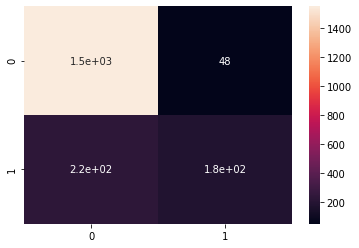

In [129]:
sns.heatmap(cm,annot=True)

In [130]:
print(accuracy_score(y_test,y_pred))

0.8635
